In [1]:
import sys
import os

sys.path.append(os.path.join(os.path.dirname("__file__"), '../'))
from metrics import diff
from metrics import flow
from metrics import tension

In [2]:
# planck path
planck_path = '/home/grads/ownCloud/StatisticalProject/chains/plikHM_TTTEEE/base_plikHM_TTTEEE'
# LSST path
lsst_path = '/home/grads/data/evan/mc_data/fiducial'

In [3]:
# instantiate diff
chains = diff.chain()
chain1 = chains.getdist_reader(planck_path)
chain2 = chains.getdist_reader(lsst_path)
chains.chains = [chain1,chain2]
chains.diff()

/home/grads/ownCloud/StatisticalProject/chains/plikHM_TTTEEE/base_plikHM_TTTEEE_3.txt
/home/grads/ownCloud/StatisticalProject/chains/plikHM_TTTEEE/base_plikHM_TTTEEE_4.txt
/home/grads/ownCloud/StatisticalProject/chains/plikHM_TTTEEE/base_plikHM_TTTEEE_2.txt
/home/grads/ownCloud/StatisticalProject/chains/plikHM_TTTEEE/base_plikHM_TTTEEE_1.txt
Removed no burn in
/home/grads/data/evan/mc_data/fiducial.txt
Removed no burn in

Params in first chain:
['omegabh2', 'omegach2', 'theta', 'tau', 'logA', 'ns', 'acib217', 'xi', 'asz143', 'aps100', 'aps143', 'aps143217', 'aps217', 'aksz', 'kgal100', 'kgal143', 'kgal143217', 'kgal217', 'galfTE100', 'galfTE100143', 'galfTE100217', 'galfTE143', 'galfTE143217', 'galfTE217', 'cal0', 'cal2', 'calPlanck']

Params in second chain:
['logA', 'ns', 'H0', 'omegab', 'omegac']

 Common params found:
['logA', 'ns']

N1 = 1128000
N2 = 39622


In [4]:
#Lets plot each chain
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
%matplotlib inline

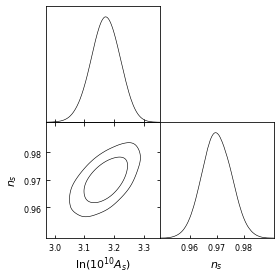

In [5]:
g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 2
g.triangle_plot(chain1,
               filled=False,
               params=chains.params)

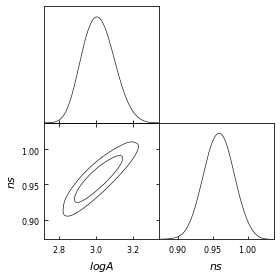

In [6]:
g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 2
g.triangle_plot(chain2,
               filled=False,
               params=chains.params)

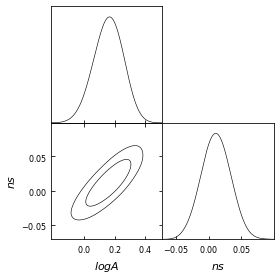

In [7]:
g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 2
g.triangle_plot(chains.diff_chain,
               filled=False,
               params=chains.params)

In [8]:
maf = flow.MAF(len(chains.params))

2022-06-16 16:00:11.905674: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-16 16:00:12.372132: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3376 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 960, pci bus id: 0000:09:00.0, compute capability: 5.2


2022-06-16 16:00:12.483238: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x55d4eb4b8eb0


---   MADE info   ---
 - Hidden_units = [4, 4]
 - Activation = <function asinh at 0x7f813e9ddb00>

---   Model info   ---
 - N samples = 1128000
 - Non-uniform weights
 - Pre-Gaussian Map = True

 - Validation split = 0.1
 - Number MAFS = 4 
 - Trainable parameters = 208 

[####################] Completed!                          


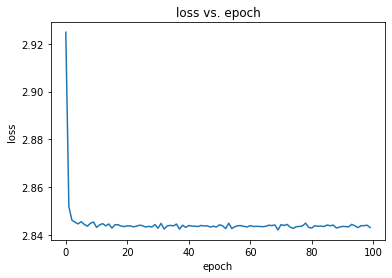

In [9]:
maf.setup()
maf.train(chains.diff_chain,batch_size=50000)

In [12]:
nsigma,high,low = tension.flow_significance(
                        maf.target_dist,
                        maf.gauss_bijector,
                        len(chains.params)
                        )
print(r"n_sigma = {:.5f} +{:.5f}/-{:.5f}".format(nsigma,high-nsigma,nsigma-low))

n_sigma = 1.55801 +0.00432/-0.00432


In [ ]:
#